In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
import shapely
import plotly.express as px
import osmnx as ox
from adjustment_formula import *

## Importación de BBDD

### Manzanas

In [2]:
manzanas = gpd.read_file('../data/lima_manzanas.gpkg')

In [3]:
manzanas_tiempos = gpd.read_file('../data/BBDD Perú accesibilidad/manzanas_y_tiempos_discapacidad.geojson')

In [4]:
print(manzanas.shape)
manzanas.head()

(124903, 31)


,Mz,UBIGEO,AREA,CODCCPP,ZONA,MANZANA_ID,MANZANA_A,T_TOTAL,T_HOMBRES,T_MUJERES,...,CCPP,CCDI,NOMBDIST,CAPITAL,CODIGO,CNT_CCPP,DESCRIPCIO,layer,path,geometry
0,150102000102100023,150102,1,0001,02100,023,None,18.0,7.0,11.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723..."
1,150102000101101010,150102,1,0001,01101,010,None,31.0,14.0,17.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151..."
2,150102000100600037,150102,1,0001,00600,037,None,71.0,32.0,39.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981..."
3,150102000101202048,150102,1,0001,01202,048,None,12.0,5.0,7.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140..."
4,150102000101202010A,150102,1,0001,01202,010,A,2.0,0.0,2.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255..."


In [5]:
manzanas_tiempos.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 165397 entries, 0 to 165396
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Mz                     165397 non-null  object  
 1   InputID                165397 non-null  object  
 2   TargetID               165397 non-null  int64   
 3   Distance               165397 non-null  float64 
 4   distancia_a_centro_05  160474 non-null  float64 
 5   duracion_a_centro_05   160474 non-null  float64 
 6   geometry               165397 non-null  geometry
dtypes: float64(3), geometry(1), int64(1), object(2)
memory usage: 8.8+ MB


In [6]:
manzanas_tiempos = manzanas_tiempos.drop(columns="geometry")
manzanas_tiempos = manzanas_tiempos.rename(columns={"distancia_a_centro_05": "distancia_a_centro_disc", "duracion_a_centro_05": "duracion_a_centro_disc"})

In [7]:
manzanas_merge = pd.merge(manzanas, manzanas_tiempos, on="Mz", how="left")
manzanas_merge.head()

,Mz,UBIGEO,AREA,CODCCPP,ZONA,MANZANA_ID,MANZANA_A,T_TOTAL,T_HOMBRES,T_MUJERES,...,CNT_CCPP,DESCRIPCIO,layer,path,geometry,InputID,TargetID,Distance,distancia_a_centro_disc,duracion_a_centro_disc
0,150102000102100023,150102,1,0001,02100,023,None,18.0,7.0,11.0,...,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723...",150102000102100023,354,691.528912,5.4523,65.495000
1,150102000101101010,150102,1,0001,01101,010,None,31.0,14.0,17.0,...,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151...",150102000101101010,125,2894.873621,6.2620,75.146667
2,150102000100600037,150102,1,0001,00600,037,None,71.0,32.0,39.0,...,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981...",150102000100600037,76,728.899809,0.9826,11.791667
3,150102000101202048,150102,1,0001,01202,048,None,12.0,5.0,7.0,...,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140...",150102000101202048,125,2607.341636,5.6990,68.391667
4,150102000101202010A,150102,1,0001,01202,010,A,2.0,0.0,2.0,...,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255...",150102000101202010A,125,2758.490420,7.0731,84.883333


### Demanda

In [8]:
demanda = pd.read_csv("../data/BBDD Perú demanda/1_vm_limamet_pobdisc_mz.csv")
print(demanda.shape)
demanda.head()

(48897, 7)


,id,ubigeo,nombdist,cod_mz,pobdisc_mz,pobdisc_dist,geom
0,7.0,150102,ANCON,150102000101202015B,2,1452,0106000020E61000000100000001030000000100000007...
1,9.0,150102,ANCON,150102000101101009B,2,1452,0106000020E6100000010000000103000000010000000D...
2,11.0,150102,ANCON,150102000101600020B,2,1452,0106000020E6100000010000000103000000010000000E...
3,12.0,150102,ANCON,150102000100500030,2,1452,0106000020E61000000100000001030000000100000005...
4,14.0,150102,ANCON,150102000100400044,4,1452,0106000020E61000000100000001030000000100000006...


In [9]:
demanda.columns

Index(['id', 'ubigeo', 'nombdist', 'cod_mz', 'pobdisc_mz', 'pobdisc_dist',
       'geom'],
      dtype='object')

In [10]:
demanda_reduc = demanda[[ 'cod_mz', 'pobdisc_mz', 'pobdisc_dist']]
manzanas_merged = pd.merge(manzanas_merge, demanda_reduc, left_on="Mz", right_on="cod_mz", how="left")

manzanas_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 172693 entries, 0 to 172692
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Mz                       172693 non-null  object  
 1   UBIGEO                   172693 non-null  object  
 2   AREA                     172693 non-null  object  
 3   CODCCPP                  172693 non-null  object  
 4   ZONA                     172693 non-null  object  
 5   MANZANA_ID               169040 non-null  object  
 6   MANZANA_A                64069 non-null   object  
 7   T_TOTAL                  172693 non-null  float64 
 8   T_HOMBRES                172693 non-null  float64 
 9   T_MUJERES                172693 non-null  float64 
 10  LLAVE_MZS                172693 non-null  object  
 11  contacto                 172693 non-null  object  
 12  descargar                172693 non-null  object  
 13  whatsapp                 172693 non-

### Oferta

In [11]:
oferta = pd.read_csv("../data/BBDD Perú oferta/clean/oferta_discapacidad_clean.csv")
oferta

,nombre,lat,lng,id
0,01 CORAZON DE MARIA,-12.084500,-77.070750,1
1,01 CORAZON DE MARIA,-12.084500,-77.070750,2
2,0118 BERNARDINO JINEZ HUARINGA,-12.092533,-77.079155,3
3,014 LA SAGRADA FAMILIA,-12.090660,-77.069610,4
4,014 LA SAGRADA FAMILIA,-12.090660,-77.069610,5
...,...,...,...,...
572,CSMC SANTA ROSA DE MANCHAY,-12.094895,-76.885189,573
573,CSMC MEDALLA MILAGROSA,-12.127918,-76.871090,574
574,CSMC CRL SAN WILELMO PEDRO ZORILLA HUAMÁN,-12.158380,-77.020024,575
575,CSMC VIRGEN DE LA MERCED,-12.242272,-76.929399,576


In [12]:
oferta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nombre  577 non-null    object 
 1   lat     577 non-null    float64
 2   lng     577 non-null    float64
 3   id      577 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 18.2+ KB


### Tiempos de viaje

El dataset contiene 2 variables:  
0 corresponde a la distancia  
1 corresponde a la duración del recorrido  

In [13]:
# tiempos = pd.read_csv("../data/BBDD Perú accesibilidad/distance_duration_discapacidad.csv")
# print(tiempos.shape)
# tiempos.head()

#### Matcheo de bases a manzanas

In [14]:
# manzanas_merged['distancia_a_centro_disc'] =  tiempos["0"] / 1000 # metros a km
# manzanas_merged['duracion_a_centro_disc'] = tiempos["1"] / 60 # segundos a minutos

# Desiertos de cuidado

In [15]:
manzanas_merged.columns

Index(['Mz', 'UBIGEO', 'AREA', 'CODCCPP', 'ZONA', 'MANZANA_ID', 'MANZANA_A',
       'T_TOTAL', 'T_HOMBRES', 'T_MUJERES', 'LLAVE_MZS', 'contacto',
       'descargar', 'whatsapp', 'NOMBDEP', 'NOMBPROV', 'IDPROV', 'ARCHIVO',
       'Nombre', 'Apellido', 'CCDD', 'CCPP', 'CCDI', 'NOMBDIST', 'CAPITAL',
       'CODIGO', 'CNT_CCPP', 'DESCRIPCIO', 'layer', 'path', 'geometry',
       'InputID', 'TargetID', 'Distance', 'distancia_a_centro_disc',
       'duracion_a_centro_disc', 'cod_mz', 'pobdisc_mz', 'pobdisc_dist'],
      dtype='object')

In [16]:
df = pd.DataFrame(manzanas_merged.drop(columns=['Mz', 'UBIGEO', 'AREA', 'CODCCPP', 'ZONA', 'MANZANA_ID', 'MANZANA_A',  'LLAVE_MZS', 'contacto',
       'descargar', 'whatsapp', 'NOMBDEP', 'NOMBPROV', 'IDPROV', 'ARCHIVO',
       'Nombre', 'Apellido', 'CCDD', 'CCPP', 'CCDI', 'NOMBDIST', 'CAPITAL',
       'CODIGO', 'CNT_CCPP', 'DESCRIPCIO', 'layer', 'path', 'cod_mz', 'T_HOMBRES', 'T_MUJERES', 'pobdisc_dist',
       "InputID", "TargetID"]))

# Dejo geometry para dropear despues de quitar nulls

df['pobdisc_mz'] = df['pobdisc_mz'].fillna(0)

# df = df.dropna()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172693 entries, 0 to 172692
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   T_TOTAL                  172693 non-null  float64 
 1   geometry                 172693 non-null  geometry
 2   Distance                 172693 non-null  float64 
 3   distancia_a_centro_disc  167470 non-null  float64 
 4   duracion_a_centro_disc   167470 non-null  float64 
 5   pobdisc_mz               172693 non-null  float64 
dtypes: float64(5), geometry(1)
memory usage: 7.9 MB


Defino como zonas 'problemáticas' aquellas donde el tiempo caminando es mayor a 20 minutos (considerando que esta caminata se da cargando hijos pequeños). Un 3% de los territorios termina caracterizado como zona a prestarle atención.

In [18]:
df['desierto'] = (df['duracion_a_centro_disc'] > 20).astype(int)
df.desierto.value_counts()

desierto
0    93984
1    78709
Name: count, dtype: int64

Para clasificar la población, normalizamos la data y estudiamos criterios empíricos.

In [19]:
print(df.pobdisc_mz.median())
df.pobdisc_mz.describe()


0.0


count    172693.000000
mean          1.077838
std           2.478530
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         264.000000
Name: pobdisc_mz, dtype: float64

In [20]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['pobdisc_mz']  

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[columns_to_scale])



In [21]:
df["pob_disc_mz_normal"]= df_scaled

In [22]:
df.pob_disc_mz_normal.describe()

count    1.726930e+05
mean    -1.974953e-17
std      1.000003e+00
min     -4.348710e-01
25%     -4.348710e-01
50%     -4.348710e-01
75%     -3.140482e-02
max      1.060802e+02
Name: pob_disc_mz_normal, dtype: float64

Estudio tres posibilidades:

In [23]:
umbral1 = df.pob_disc_mz_normal.mean()
umbral2 = df.pob_disc_mz_normal.mean() + df.pob_disc_mz_normal.std()
umbral3 = df.pob_disc_mz_normal.median()

In [24]:
df['alta_demanda'] = (df['pob_disc_mz_normal'] >= umbral1).astype(int)
#df['alta_demanda_2'] = (df['pob_disc_mz_normal'] >= umbral2).astype(int)
#df['alta_demanda'] = (df['pob_disc_mz_normal'] >= umbral3).astype(int)

print(df.alta_demanda.value_counts())
#print(df.alta_demanda_2.value_counts())
#print(df.alta_demanda.value_counts())

alta_demanda
0    135252
1     37441
Name: count, dtype: int64


En este caso elijo la media, ya que la mediana es 0.

In [25]:
df["desierto_disc"] = df["desierto"] * df["alta_demanda"]
df.desierto_disc.value_counts()

desierto_disc
0    164749
1      7944
Name: count, dtype: int64

In [26]:
df.columns

Index(['T_TOTAL', 'geometry', 'Distance', 'distancia_a_centro_disc',
       'duracion_a_centro_disc', 'pobdisc_mz', 'desierto',
       'pob_disc_mz_normal', 'alta_demanda', 'desierto_disc'],
      dtype='object')

In [27]:
df_for_csv = df[["geometry", "T_TOTAL", 'pobdisc_mz', 'distancia_a_centro_disc', 'duracion_a_centro_disc', "alta_demanda", "desierto_disc"]]
df_for_csv.head()

,geometry,T_TOTAL,pobdisc_mz,distancia_a_centro_disc,duracion_a_centro_disc,alta_demanda,desierto_disc
0,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723...",18.0,0.0,5.4523,65.495000,0,0
1,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151...",31.0,0.0,6.2620,75.146667,0,0
2,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981...",71.0,0.0,0.9826,11.791667,0,0
3,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140...",12.0,0.0,5.6990,68.391667,0,0
4,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255...",2.0,0.0,7.0731,84.883333,0,0


In [28]:
#df_for_csv['geometry'] = df_for_csv['geometry'].apply(wkt.loads)

# Now create the GeoDataFrame
gdf = gpd.GeoDataFrame(df_for_csv, geometry='geometry')

manzanas_merged_2 = pd.merge(gdf, manzanas[["Mz", "UBIGEO", 'AREA', 'CODCCPP', 'ZONA', 'MANZANA_ID', 'MANZANA_A', 'geometry']], on="geometry", how="left")
print(manzanas_merged_2.shape)
manzanas_merged_2.head()

(184517, 14)


,geometry,T_TOTAL,pobdisc_mz,distancia_a_centro_disc,duracion_a_centro_disc,alta_demanda,desierto_disc,Mz,UBIGEO,AREA,CODCCPP,ZONA,MANZANA_ID,MANZANA_A
0,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723...",18.0,0.0,5.4523,65.495000,0,0,150102000102100023,150102,1,0001,02100,023,None
1,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151...",31.0,0.0,6.2620,75.146667,0,0,150102000101101010,150102,1,0001,01101,010,None
2,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981...",71.0,0.0,0.9826,11.791667,0,0,150102000100600037,150102,1,0001,00600,037,None
3,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140...",12.0,0.0,5.6990,68.391667,0,0,150102000101202048,150102,1,0001,01202,048,None
4,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255...",2.0,0.0,7.0731,84.883333,0,0,150102000101202010A,150102,1,0001,01202,010,A


In [29]:
manzanas_merged_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 184517 entries, 0 to 184516
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   geometry                 184517 non-null  geometry
 1   T_TOTAL                  184517 non-null  float64 
 2   pobdisc_mz               184517 non-null  float64 
 3   distancia_a_centro_disc  178694 non-null  float64 
 4   duracion_a_centro_disc   178694 non-null  float64 
 5   alta_demanda             184517 non-null  int32   
 6   desierto_disc            184517 non-null  int32   
 7   Mz                       184517 non-null  object  
 8   UBIGEO                   184517 non-null  object  
 9   AREA                     184517 non-null  object  
 10  CODCCPP                  184517 non-null  object  
 11  ZONA                     184517 non-null  object  
 12  MANZANA_ID               180864 non-null  object  
 13  MANZANA_A                70437 non-n

### Population density calculations

In [30]:
gdf_projected = pop_density(gdf=manzanas_merged_2, projected_crs='EPSG:24891', tot_pob_col='T_TOTAL')

In [31]:
gdf_projected.groupby('desierto_disc')['area_manzana'].mean()

desierto_disc
0     6464.453100
1    10553.692668
Name: area_manzana, dtype: float64

### Desert recalculation with adjustment formula

In [32]:
manzanas_disc_recalc = adjustment_factor(gdf_projected, beta=10, gamma=5, umbral_area=0.80, 
                                         nombre_col_desierto='desierto_disc_recalc',
                                         travel_time_col='duracion_a_centro_disc')

In [33]:
# Compare results
print("Care deserts recalculated with adjustment:")
print(manzanas_disc_recalc["desierto_disc_recalc"].value_counts())

print("\nOriginal care deserts classification:")
print(manzanas_disc_recalc["desierto_disc"].value_counts())

Care deserts recalculated with adjustment:
desierto_disc_recalc
0    176811
1      7706
Name: count, dtype: int64

Original care deserts classification:
desierto_disc
0    176157
1      8360
Name: count, dtype: int64


In [34]:
# Tracts considered care deserts before the adjustment
care_deserts_before = manzanas_disc_recalc[manzanas_disc_recalc["desierto_disc"] == 1]['area_manzana']

# Tracts considered care deserts after the adjustment
care_deserts_after = manzanas_disc_recalc[manzanas_disc_recalc["desierto_disc_recalc"] == 1]['area_manzana']

# Calculate descriptive statistics
print("Before Adjustment:")
print(care_deserts_before.describe())

print("\nAfter Adjustment:")
print(care_deserts_after.describe())

Before Adjustment:
count    8.360000e+03
mean     1.055369e+04
std      4.721966e+04
min      8.515033e+01
25%      2.403977e+03
50%      4.044212e+03
75%      6.614859e+03
max      1.575732e+06
Name: area_manzana, dtype: float64

After Adjustment:
count      7706.000000
mean       6515.388111
std       18609.578960
min          85.150332
25%        2285.265129
50%        3753.821501
75%        5790.660071
max      565535.294936
Name: area_manzana, dtype: float64


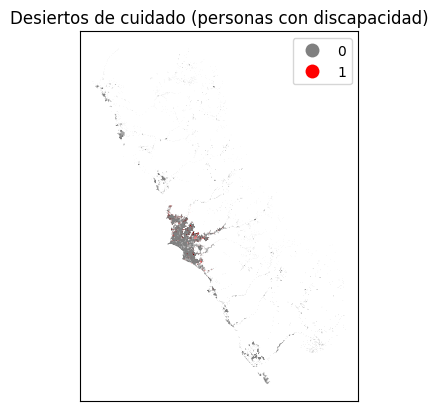

In [35]:
import matplotlib
#geopan = gpd.GeoDataFrame(df, geometry='geometry')

# Define a custom color map: red for 1, grey for 0
cmap = matplotlib.colors.ListedColormap(['grey', 'red'])

# Create a normalization object that maps your data values (0 and 1) to the colormap
norm = matplotlib.colors.BoundaryNorm([0, 0.5, 1], cmap.N)

fig, ax = plt.subplots(1, 1)

# Plot using the custom colormap and normalization
manzanas_disc_recalc.plot(column='desierto_disc_recalc', ax=ax, legend=True, categorical=True, cmap=cmap, norm=norm)

# Remove longitude and latitude ticks
ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Desiertos de cuidado (personas con discapacidad)')

# Save the figure with high resolution
plt.savefig('../figs/desiertos_de_cuidado_disc.png', format='png', dpi=1500)

plt.show()

In [36]:
manzanas_disc_recalc[manzanas_disc_recalc['Mz'] == '150103000100100035'] 

,geometry,T_TOTAL,pobdisc_mz,distancia_a_centro_disc,duracion_a_centro_disc,alta_demanda,desierto_disc,Mz,UBIGEO,AREA,CODCCPP,ZONA,MANZANA_ID,MANZANA_A,area_manzana,densidad_pob,combined_adjustment,adjusted_threshold,desierto_2,desierto_disc_recalc
2520,"MULTIPOLYGON (((604533.783 754446.499, 604565....",631.0,6.0,2.1416,25.703333,1,1,150103000100100035,150103,1,0001,00100,035,None,7308.477974,86338.086017,1.654618,21.654618,1,1


In [37]:
manzanas_disc_recalc = manzanas_disc_recalc[['Mz', 'UBIGEO', 'AREA', 'CODCCPP',
       'ZONA', 'MANZANA_ID', 'MANZANA_A', 'geometry',  'pobdisc_mz', 'distancia_a_centro_disc',
       'duracion_a_centro_disc', 'alta_demanda', 'desierto_disc_recalc', 'adjusted_threshold']]

manzanas_disc_recalc = manzanas_disc_recalc.rename(columns={"adjusted_threshold": "umbral_t_dinamico"})

manzanas_disc_recalc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 184517 entries, 0 to 184516
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Mz                       184517 non-null  object  
 1   UBIGEO                   184517 non-null  object  
 2   AREA                     184517 non-null  object  
 3   CODCCPP                  184517 non-null  object  
 4   ZONA                     184517 non-null  object  
 5   MANZANA_ID               180864 non-null  object  
 6   MANZANA_A                70437 non-null   object  
 7   geometry                 184517 non-null  geometry
 8   pobdisc_mz               184517 non-null  float64 
 9   distancia_a_centro_disc  178694 non-null  float64 
 10  duracion_a_centro_disc   178694 non-null  float64 
 11  alta_demanda             184517 non-null  int32   
 12  desierto_disc_recalc     184517 non-null  int32   
 13  umbral_t_dinamico        184517 non-

In [38]:
manzanas_disc_recalc.to_csv("../results - desiertos/desiertos_ajustados/desiertos_disc_recalc.csv", index=False, sep=";", decimal=",")

In [39]:
manzanas_disc_recalc.to_file("../results - desiertos/desiertos_ajustados/desiertos_disc_recalc.geojson", driver='GeoJSON')